### Introduction

In this exercise we will implement a neural network (NN) architecture from scratch. Building the neural network will give a hands-on experience converting mathematical foundations of NN such as feed-forward and backpropagation algorithms into Python code. The exercise will also include implementation of sub-functions in NN such as loss functions, activation functions, and derivatives.

The model implemented will be tested on following examples:

#### Classification:

1. AND/OR Logic
2. XOR Logic

#### Regression:

1. Sinusoidal curve
2. Gaussian curve

The model will be evaluated on real world data using the Wisconsin Breast Cancer Dataset. 





### Problem Description

You are provided with a base Class for implementation of a simple Neural Network. You will also be provided with templates for some of the helper functions. You are required to implement functions in the Neural Network Class. You are also required to test your neural network with various datasets and show the effect of modifying parameters. Below is a list of problems that you are expected to solve in this exercise:

1. Complete the implementation of Feedforward and Backpropagation
2. Implement functions for train, predict, and evaluate
3. Generate datasets for AND, XOR logics and Sinusoidal, Gaussian functions
4. Test your model using the above datasets. What are you choice of model parameters and how does it affect the performance?
5. Implement functions to improve model performance. What are your observations
6. Evaluate model performance on Wisconsin Breast Cancer dataset. What is the highest accuracy score obtained?

### Notes

1. Only following Python libraries (and their functions) are allowed: **numpy, pandas, matplotlib, seaborn.** (The code provided include the use of sklearn library for loading data, evaluation, and TSNE encoding. Do not load any other functions from sklearn.)
2. Following libraries from Python may not be used: **Keras, TensorFlow, pytorch, thean, scikit-learn (except functions that are already included)**
3. You may refer to online resources but do not copy+paste. All submitted items will be checked for Plagiarism.
4. The base class provided is for your reference. You are welcome to implement the NN algorithm differently. In that case, ensure that your implementation covers all the sub-problems. Also explain your methodology.

### Import Libraries

* numpy, pandas - Data handling and processing
* matplotlib, seaborn - Visualization
* tqdm - For implementing progressbars
* sklearn - datasets: to load breast cancer dataset, TSNE: for visualization


In [ ]:
# Imports
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(np.random.random(10))
print(np.random.random(10))

[0.55107384 0.8293605  0.94010508 0.93394536 0.26661945 0.41016175
 0.02892481 0.63217081 0.90844981 0.58267821]
[0.13237051 0.29820573 0.93317241 0.37234986 0.30949835 0.79195073
 0.12109808 0.49504165 0.15403596 0.27466067]


In [ ]:
print(np.random.RandomState(seed=30).random(10))
print(np.random.RandomState(seed=20).random(10))

[0.64414354 0.38074849 0.66304791 0.16365073 0.96260781 0.34666184
 0.99175099 0.2350579  0.58569427 0.4066901 ]
[0.5881308  0.89771373 0.89153073 0.81583748 0.03588959 0.69175758
 0.37868094 0.51851095 0.65795147 0.19385022]


In [ ]:
print(np.random.RandomState(20).random(2))

[0.5881308  0.89771373]


### Phase 1: Implement and test a baseline Neural Network

#### 1.1 Activation functions and derivatives

In the below cell we define sigmoid activation function and its derivative

In [ ]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Activation function
def relu(t):
    return np.maximum(0,t) #这里放np.maximum() 和 max() 有啥区别啊

# Derivative of relu
def relu_derivative(p):
  p[p<=0] = 0
  p[p>0] = 1
  return p

# testing for Activation function
t = np.random.uniform(0.0, 10.0, (3,3))
print(t)
print(relu(t), "\n")

# testing for Derivative of relu
p = np.random.uniform(-1.0, 1.0, (3,3)) 
print(p)
print(relu_derivative(p))


[[4.4829416  8.23746034 0.14861413]
 [0.15886049 4.79249679 1.81624298]
 [5.50523689 6.26708086 9.43811059]]
[[4.4829416  8.23746034 0.14861413]
 [0.15886049 4.79249679 1.81624298]
 [5.50523689 6.26708086 9.43811059]] 

[[ 0.69879704 -0.58157455  0.09813246]
 [-0.76858558  0.63355057 -0.52391769]
 [ 0.34100569 -0.65007347 -0.98914733]]
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


#### 1.2 Loss functions and derivatives

In the below cell we define rmse loss function and its derivative

In [ ]:
# Loss function - RMSE
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

# Loss function derivative - RMSE
def rmse_derivative(y, ypred):
    return 2*(y - ypred)

# Loss function - Cross Entropy
# def cross_entropy(X,y):
    # X = X.clip(min=1e-8,max=None)
    # return 
    
def cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = y.shape[0]
    p = softmax(X)
    # We use multidimensional array indexing to extract 
    # softmax probability of the correct label for each sample.
    # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
    log_likelihood = -np.log(p[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss


# Loss function derivative - Cross Entropy
# def cross_entropy_derivative(X,y):
    # return 

#### 1.3 Base Class

Below is the base class implementation for Neural Network. Please add code whereever it reads **Write your code here**

In [ ]:
################# test only ########################
#def cross_entropy():
 #   self.weights1   = np.random.rand(self.input.shape[1],4) 
  #  self.weights2   = np.random.rand(4,1)   
  #  print(self.weights1)
 #   print(self.weights2)
################# test only ########################

In [ ]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        """
        Class initializer. Loads the value of input data and initializes weights

        Parameters:
        x: input data
        y: ground truth label

        Sets class parameters:
        self.x = input data
        self.y = ground truth label
        self.ypred = initialize prediction variable with zeros as the same shape as ground truth

        self.weights = weights for each layer
        self.bias = bias for each layer

        self.hidden_nodes = number of nodes in the hidden layer
        """

        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes = hidden_nodes
        
        self.weights1 = np.random.rand(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.rand(self.hidden_nodes, 1)

        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)

        self.lr = learning_rate
        
        
    def feedforward(self):
        """
        Perform feedforward operation: input -> layer1 -> layer2
        
        HINT:
        layer1 = activation(weight1<dot>x + bias1)
        layer2 = activation(weight2<dot>x + bias2)

        For example: self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)

        Parameters:
        x: input data
        y: ground truth label

        Return:
        self.layer2: The output from layer2
        """

        #Write your code here
        self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.layer2
        # Basically, it is just convert 2-layer Feedforward equation into 2 saparate row of code in python.
        # Each row is representing 1 layer output formula.


    def backprop(self):
        """
        Perform backpropagation to update weights and bias: loss -> layer2 -> layer1
        
        HINT:
        d_loss = derivative of loss (example rmse_derivative)
        d_weights2 = layer1_out <dot> d_loss*d_activation
        d_bias2 = I <dot> d_loss*d_activation

        repeat for d_weights1 and d_bias1

        Update weights and bias based on the error and learning rate

        Updates:
        Model weights and biases
        """
        d_loss_layer2 = rmse_derivative(self.y, self.ypred)
        #d_loss_layer2 = rmse_derivative(self.y, self.layer2)
        
        # Write your code here
        # Layer 2
      #  d_weights2 = np.dot(self.layer1.T, (d_loss_layer2 * sigmoid_derivative(self.layer2)))
      #  d_bias2 = np.dot(np.ones((1, (d_loss_layer2 * sigmoid_derivative(self.layer2)).shape[0])), (d_loss_layer2 * sigmoid_derivative(self.layer2)))
        # !!!!By dividing long equation into several equations. It would be easier to debug or edit the parameters!!!!!

        gradient2 = (d_loss_layer2 * sigmoid_derivative(self.layer2))
        d_weights2 = np.dot(self.layer1.T, gradient2)
        d_bias2 = np.dot(np.ones((1, gradient2.shape[0])), gradient2)
        # Follow the fomula, layer1output dot (derevative of loss * derivative of activation function)
        # matrix2 is "d_loss_layer2*d_activation" at layer2
        # np.ones(size_of_vector) => to make them all ones. 
        # matrix2.shape, which would return (# columns, # rows of the matrix) or len(matrix2[0]))
        # to get the matrix size of "1 x matrix2.shape[0]" => 1 x "column size"
        
        # Layer 1
        d_loss_layer1 = np.dot(gradient2, self.weights2.T)
        gradient1 = (d_loss_layer1 * sigmoid_derivative(self.layer1))
        d_weights1 = np.dot(self.x.T, gradient1)
        d_bias1 = np.dot(np.ones((1, gradient1.shape[0])), gradient1)
        # weight 1 is a bit more complicated, cuz it is back propagation, 
        # np.dot(d_loss_layer2 * sigmoid_derivative(self.layer2), self.weights2.T) is considered as "d_loss" for the 1st layer
        # The rest just follow the weight2 fomula
        # Follow the formula of d_bias2 will get the above formula


        self.weights1 = self.weights1 + self.lr * d_weights1
        self.weights2 = self.weights2 + self.lr * d_weights2
        self.bias1 = self.bias1 + self.lr * d_bias1
        self.bias2 = self.bias2 + self.lr * d_bias2


    def train(self, x, y):
        """
        Train the model based on training data passed as input
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        x: input data
        y: ground truth label

        Return: NONE

        Updates: prediction self.ypred
        """
        self.x = x
        self.y = y

        # Write your code here
        # predict
        self.ypred = self.feedforward()
        self.backprop()
    
    def predict(self, x):
        """
        Predict the outcome for the given input using current model
        
        HINT:
        For prediction output is obtained by performing feedforward

        Parameters:
        x: input data

        Return: output prediction using the model (self.ypred)
        """
        self.x = x

        # Write your code here
        self.ypred = self.feedforward() 
        return self.ypred

    def evaluate(self, y, ypred):
        """
        Compute the error for given ground truth and prediction obtained
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        y: ground truth
        ypred: output prediction

        Return: prediction error self.loss
        """
        self.y = y
        self.ypred = ypred

        # write your code here
        self.loss = rmse(self.y, self.ypred)
        return self.loss

#### 1.4 Backpropagation Algorithm

<img src="https://miro.medium.com/max/1742/1*FceBJSJ7j8jHjb4TmLV0Ew.png" width="600" />

Based on your code (The base NN class, activation, and loss functions) please explain how backpropagation works. Consider to explain the original algorithm and your code flow. Feel free to use mathematical equations, images, code outputs for your explanation.

You may consider the following reference:

1.   [BP Algorithm Implementation](http://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/)
2.   [How BP Algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)



#### 1.5: Classification Test

Setup data for AND logic and XOR logic. Train the model and observe if the model is able to correctly classify

For AND Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

For XOR Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |




##### 1.5.1 Initialization

In [ ]:
# XOR logic

# Each row is a training example, each column is a feature
# x = np.array(([X1, X2], ...), dtype=float)
# y = np.array(([y], ...), dtype=float)

x= np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y= np.array(([0],[1],[1],[0]), dtype=float)

hidden_nodes = 2
learning_rate = 0.5



NN = NeuralNetwork(x, y, hidden_nodes, learning_rate)
print ("Input : \n" + str(x))
print ("Actual Output: \n" + str(y))

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]


##### 1.5.2 Train model

In [ ]:
loss = []
epochs = 50000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
    loss.append(NN.evaluate(NN.y, NN.ypred))
    NN.train(x, y)

##### 1.5.3 Loss trend over epochs

Observing the loss trend helps choose model parameters. For example, if the loss is continuing to decrease, the number of epochs may need to be increased. Choice of learning rate may affect the loss trend

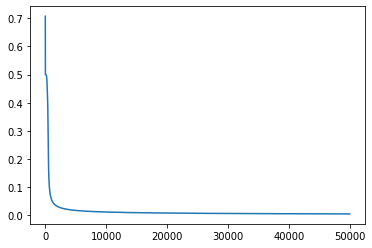

In [ ]:
plt.plot(loss)

![loss trend](https://i.imgur.com/4zg6YTs.png)

##### 1.5.4 Print weights and biases

In [ ]:
print('weights 1:\n', NN.weights1)
print('weights 2:\n', NN.weights2)

print('bias 1:\n', NN.bias1)
print('bias 2:\n', NN.bias2)

weights 1:
 [[5.34487709 7.13910711]
 [5.3457642  7.1425475 ]]
weights 2:
 [[-12.5653055 ]
 [ 11.90014594]]
bias 1:
 [[-8.18782803 -3.25665468]]
bias 2:
 [[-5.61729371]]


##### 1.5.5 Observe Decision Boundary

The below code is used to visualize the decision boundary over the region between 0 to 1 for both feature inputs. Do not modify the code below. Ensure your neural network is trained before running the code below

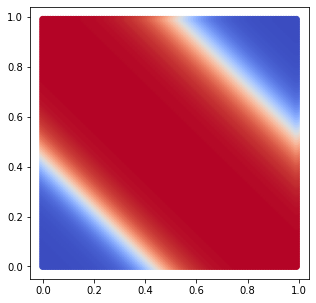

In [ ]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN.predict(x=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

# XOR logic with 8 hidden neurons, to compare with pix below

**Model with 8 hidden nodes**

![alt text](https://i.imgur.com/07ekfU8.png)

**Model with 2 hidden nodes**

![alt text](https://i.imgur.com/LdRJWyC.png)


#### 1.6 Classification: Notes

* Perform from steps **1.5.1 to 1.5.5 for each of AND logic and XOR logic** separately
* You may additional text or code cells to note down the outcomes as appropriate
* Add a text cell to highlight your observations and inference



In [ ]:
# # # # # # # # # # # # 
# Retry with AND logic#
# # # # # # # # # # # # 

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Activation function
def relu(t):
    return np.maximum(0,t) #这里放np.maximum() 和 max() 有啥区别啊

# Derivative of relu
def relu_derivative(p):
  p[p<=0] = 0
  p[p>0] = 1
  return p

# testing for Activation function
t = np.random.uniform(0.0, 10.0, (3,3))
print(t)
print(relu(t), "\n")

# testing for Derivative of relu
p = np.random.uniform(-1.0, 1.0, (3,3)) 
print(p)
print(relu_derivative(p))

# Loss function - RMSE
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

# Loss function derivative - RMSE
def rmse_derivative(y, ypred):
    return 2*(y - ypred)

class NeuralNetwork_AND:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)
        self.hidden_nodes = hidden_nodes
        self.weights1 = np.random.rand(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.rand(self.hidden_nodes, 1)
        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)
        self.lr = learning_rate
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.layer2

    def backprop(self):
        d_loss_layer2 = rmse_derivative(self.y, self.ypred)
        gradient2 = (d_loss_layer2 * sigmoid_derivative(self.layer2))
        d_weights2 = np.dot(self.layer1.T, gradient2)
        d_bias2 = np.dot(np.ones((1, gradient2.shape[0])), gradient2)
        d_loss_layer1 = np.dot(gradient2, self.weights2.T)
        gradient1 = (d_loss_layer1 * sigmoid_derivative(self.layer1))
        d_weights1 = np.dot(self.x.T, gradient1)
        d_bias1 = np.dot(np.ones((1, gradient1.shape[0])), gradient1)

        self.weights1 = self.weights1 + self.lr * d_weights1
        self.weights2 = self.weights2 + self.lr * d_weights2
        self.bias1 = self.bias1 + self.lr * d_bias1
        self.bias2 = self.bias2 + self.lr * d_bias2

    def train(self, x, y):
        self.x = x
        self.y = y

        self.ypred = self.feedforward()
        self.backprop()
    
    def predict(self, x):
        self.x = x
        self.ypred = self.feedforward() 
        return self.ypred

    def evaluate(self, y, ypred):
        self.y = y
        self.ypred = ypred
        self.loss = rmse(self.y, self.ypred)
        return self.loss

x= np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y= np.array(([0],[0],[0],[1]), dtype=float)

hidden_nodes = 2
learning_rate = 0.5

NN = NeuralNetwork_AND(x, y, hidden_nodes, learning_rate)
print ("Input : \n" + str(x))
print ("Actual Output: \n" + str(y))

[[3.2813881  4.47932204 8.31746052]
 [0.9805283  7.40930616 1.25955556]
 [3.21617741 2.7870434  9.37750966]]
[[3.2813881  4.47932204 8.31746052]
 [0.9805283  7.40930616 1.25955556]
 [3.21617741 2.7870434  9.37750966]] 

[[-0.82168753 -0.38311894  0.83102362]
 [-0.03974748 -0.65938244 -0.73562411]
 [-0.62613757  0.22760816  0.38317679]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 1.]]
Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [0.]
 [0.]
 [1.]]


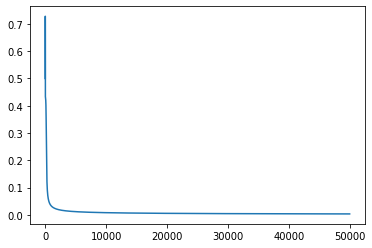

In [ ]:
loss = []
epochs = 50000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
    loss.append(NN.evaluate(NN.y, NN.ypred))
    NN.train(x, y)
plt.plot(loss)

weights 1:
 [[5.02837444 1.52866584]
 [5.16806251 0.40520296]]
weights 2:
 [[12.55058812]
 [ 0.68033374]]
bias 1:
 [[-7.60392012 -0.84518636]]
bias 2:
 [[-6.84971555]]


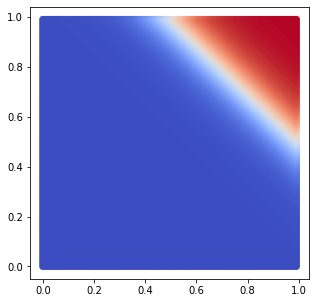

In [ ]:
print('weights 1:\n', NN.weights1)
print('weights 2:\n', NN.weights2)

print('bias 1:\n', NN.bias1)
print('bias 2:\n', NN.bias2)

outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN.predict(x=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")


1.6.5 !!!!!!!!!!!!!!!!!Observe Decision Boundary
A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous. If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable. Decision boundaries are not always clear cut.

As shown in the figure, the XOR function is linearly separable.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!EDITTTTTTTT

#### 1.7: Regression Test

Setup data for a Sinusoidal function and Gaussian function. For example,

```
x = np.arange(-1,1,0.01).reshape(-1,1)
y = np.sin(np.pi*x)
```

HINT: When the output values are negative sigmoid activation at the output may not work. You may need to consider alternatives such as linear or tanh. If you find this difficult to implement you may consider only the positive cycle range for sine.

Also note that when training entire batch of input (for eg. 200 samples) may lead to overflow. You may need to modify the code for sequential learning or mini-batch learning.

Repeat the steps from 1.5.1 to 1.5.4 and record your outcomes. For visualizing the outcome **(do not use 1.5.5)** instead run the following code.

##### 1.7.5: Observe outcomes

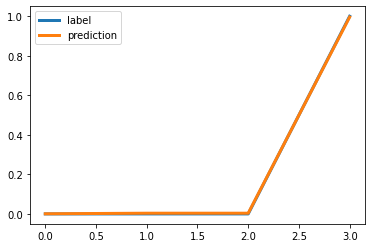

In [ ]:
plt.plot(y, linewidth=3)
plt.plot(NN.predict(x), linewidth=3)
plt.legend(['label', 'prediction'])

![Sine fit](https://i.imgur.com/zp9jsmL.png)

#### 1.8 Regrerssion: Notes

Using the steps illustrated for Problem 2 (except observing outcomes) test the ability of your neural network to perform regression task. What are your observations. How are some of the ways that the model can be improved?

### Phase 2: Integrate additional functionalities to the Neural Network model

The base class implementation of Neural Network provided is elementary and there are several features that can be improved. Implement any 3 of the following possible improvements (You are welcome to try all 5)

1. Introduce regularization of model parameters (weights and bias)
2. Enable mini-batch/ sequential learning where the number of items in a batch can be customized.
3. Implement one more hidden layer
4. Introduce ReLU activation. Implement Cross Entropy loss function.
5. Enable one or more of the following: Learning rate decay, early-stopping, Custom weights and bias initializer (eg. zeros, ones, Gaussian, etc)

HINTS:

* For 1, a regularization parameter will be required which can be set under __init__
* For 2, Batch learning can be introduced while training the model using a nested for loop approach. This does not require modification of the original class
* For 3, you will have to backpropagate loss through one more layer, which is like a chain operation
* For 4 and 5, you need to implement both the actual function (for feed-forward) and its derivate (for backpropagation)





#### Text description for Phase 2

In [ ]:
### Codes related to Phase 2






### Phase 2: Notes

* All changes to the model can be tested using any one of the datasets used for classification test *(Problem 1)*, regression test *(Problem 2)*, or breast cancer dataset *(Problem 4)*
* Any code snippet that is modified should be written separately in code cells above.
* All modification and their impact on model performance must be described in detail in text cells below. Feel free to add images, mathematical equations, flowcharts, comparison scores, etc.
* Add as many number of text or code cells as required
* Note that sometimes it is easy to copy the outcomes from a previous cell execution in the form of an image (example, right click -> save image or screenshot), and embed the image in a text cell to describe the outcome.



### Phase 3: Classify cancerous cells using Wisconsin Breast Cancer Dataset

It is important to evaluate your Neural Network implementation on real-life dataset in order to measure performance, and identify scope for improvements. In this problem you will test the best variant of your model on the breast cancer dataset. More information about the data can be found [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).



#### 3.1 Load Data

Please note that the data loaded may not be normalized. Implement a data noramalization function and process the data through the normalizer before using it for training.

The dataset consists of 569 samples and 30 features. There are two classes identifying the cancer as bening or malign.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE

In [ ]:
# DO NOT MODIFY this cell

data = load_breast_cancer().data
target = load_breast_cancer().target

test_idx = np.array([  9,  10,  12,  15,  16,  20,  22,  25,  38,  47,  57,  61,  68,
        73,  74,  84,  85,  91,  93, 108, 112, 117, 119, 135, 136, 138,
       140, 147, 149, 152, 171, 172, 173, 180, 182, 186, 187, 205, 207,
       210, 218, 235, 239, 242, 251, 267, 270, 275, 283, 285, 286, 288,
       291, 305, 307, 310, 315, 318, 319, 323, 337, 339, 346, 350, 352,
       368, 370, 374, 378, 389, 402, 408, 414, 415, 419, 422, 428, 430,
       433, 435, 442, 451, 458, 459, 464, 465, 469, 470, 480, 484, 486,
       501, 510, 532, 533, 536, 537, 543, 553, 560])

train_idx = list(set(test_idx)^set(np.arange(len(data))))

data_train = data[train_idx]
target_train = target[train_idx]

data_test = data[test_idx]
target_test= target[test_idx]

In [ ]:
# Implement code for data normalization. Remember you need to use normalization 
# parameters from training data and apply the same for test data. Eg. maximum 
# and minimum values.

# def normalize(data, tr_min, tr_max):
    # return 


# data_train_scaled = normalize(<params>)
# data_test_scaled = normalize(<params>)

#### 3.2 Training and Prediction

In [ ]:
NN = NeuralNetwork(data_train_scaled, target_train, 16, 0.01)

NameError: ignored

In [ ]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []

# for i in tqdm(range(1000)): # trains the NN 1,000 times
    




    

In [ ]:
f = plt.figure(figsize=(20,5))
plt.plot(loss)

#### 3.3 Results and Visualization

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Do not modify this cell
y_pred = NN.predict(data_train_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)

X_embedded = TSNE(n_components=2).fit_transform(data_train_scaled)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

In [ ]:
y_pred = NN.predict(data_test_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)
print(classification_report(target_test, y_pred_class))

In [ ]:
sns.heatmap(confusion_matrix(target_test, y_pred_class), annot=True, annot_kws={"size": 20}, cmap='Blues')

**Projected Distribution Visualization**

![alt text](https://i.imgur.com/BoxMIKn.png)

**Confusion Matrix**

![alt text](https://i.imgur.com/8eVnQ8X.png)

### Phase 3: Notes

Ensure that only training data is used for training the model and present your scores and results for the testing data.



### Evaluation

The scores for each problem is allocated as follows:

* P1: Completion of NN base class implementation - 3
* P1: Description of Backpropagation algorithm - 1
* P1: Successful run of Classification Tests (AND/XOR) - 3
* P1: Observations and Inferences (Reporting) - 2
* P1: Successful run of Regression Tests (Sine/Gaussian) - 3
* P1: Observations and Inferences (Reporting) - 2
* P2: Successful implementation of model improvement method:
    * 3 methods - 9
    * 5 methods - 9 + 1 bonus
* P3: Successful implementation of Breast Cancer Dataset - 3
* P3: Observations and Inferences (Reporting) - 2
* P3: Accuracy for Breast Cancer test data:
    * Accuracy < 90% (or not obtained) - 0
    * Accuracy >=90%, < 95% - 1
    * Accuracy >=95%, < 98% - 2
    * Accuracy >=98% - 2 + 1 bonus

The final score will be clipped to a maximum of 30


